<a href="https://colab.research.google.com/github/ilafmakke/analyse_data/blob/main/analyse_data_visualisepynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Airbnb listings data
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
# Display basic information about the dataset
print(df.info())

Saving listings.csv to listings (2).csv
['listings (2).csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   float64
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   float64
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   ho

In [ ]:
# Data Cleaning: Replace missing values with median
df.fillna(df.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   float64
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   float64
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

<ipython-input-7-608e6c36b040>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


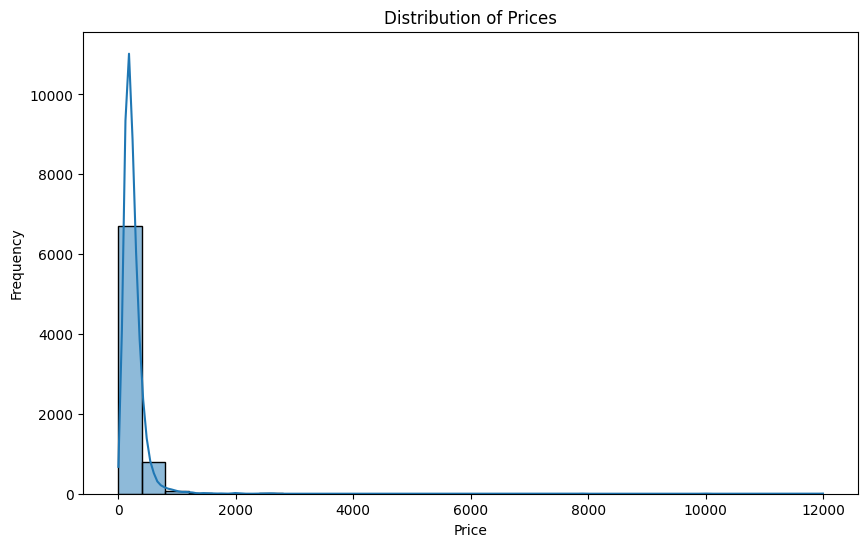

<Figure size 1000x600 with 0 Axes>

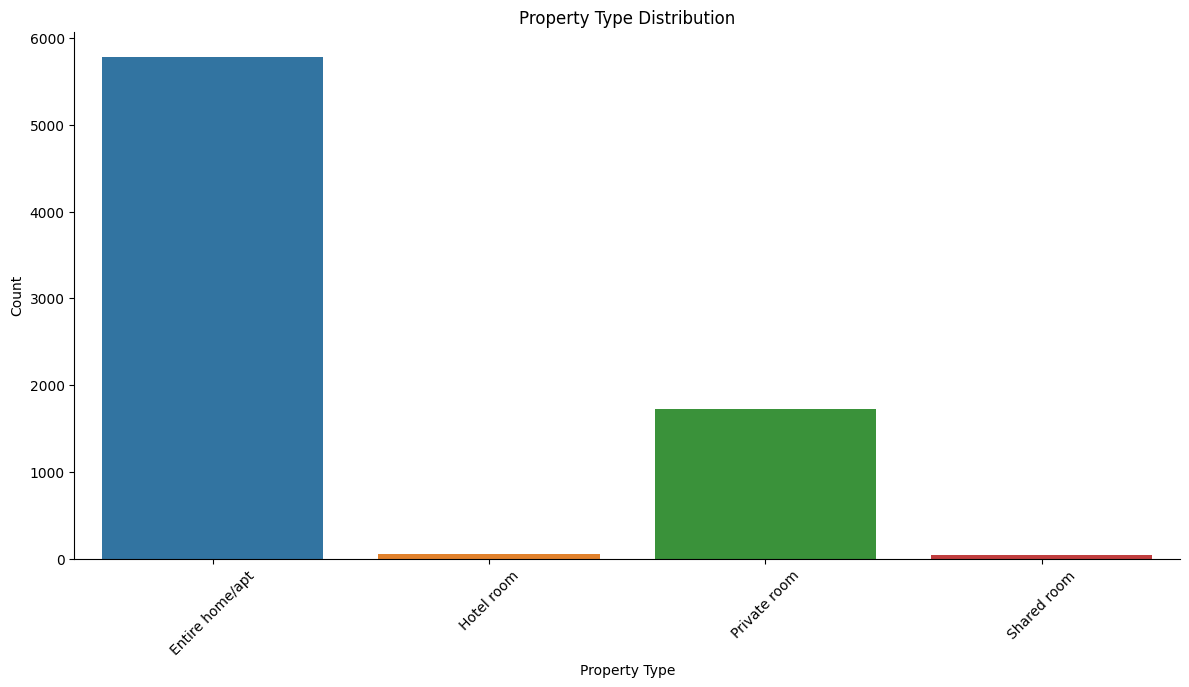

In [ ]:
df_cleaned=df
summary_stats = df_cleaned.describe()
#host_location
#availability_30
#room_type

#print(summary_stats)

# Visualizations
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Categorical plots using catplot
# Property type distribution
plt.figure(figsize=(10, 6))
sns.catplot(x='room_type', data=df_cleaned, kind='count', height=6, aspect=2)
plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

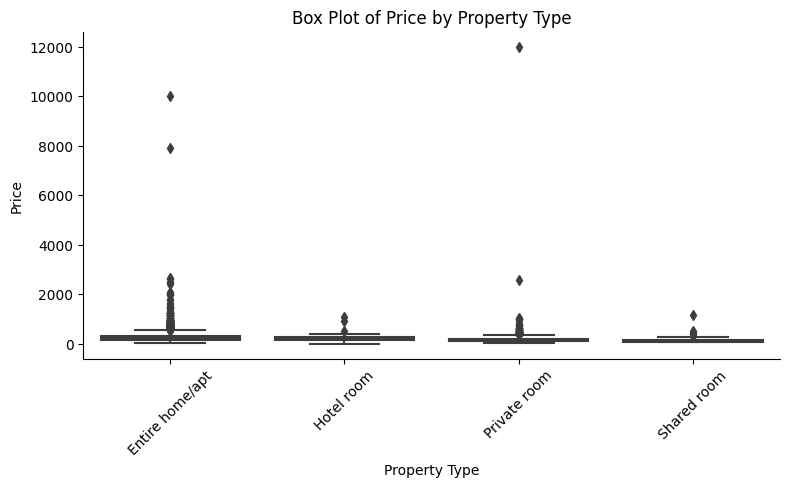

<Figure size 1000x600 with 0 Axes>

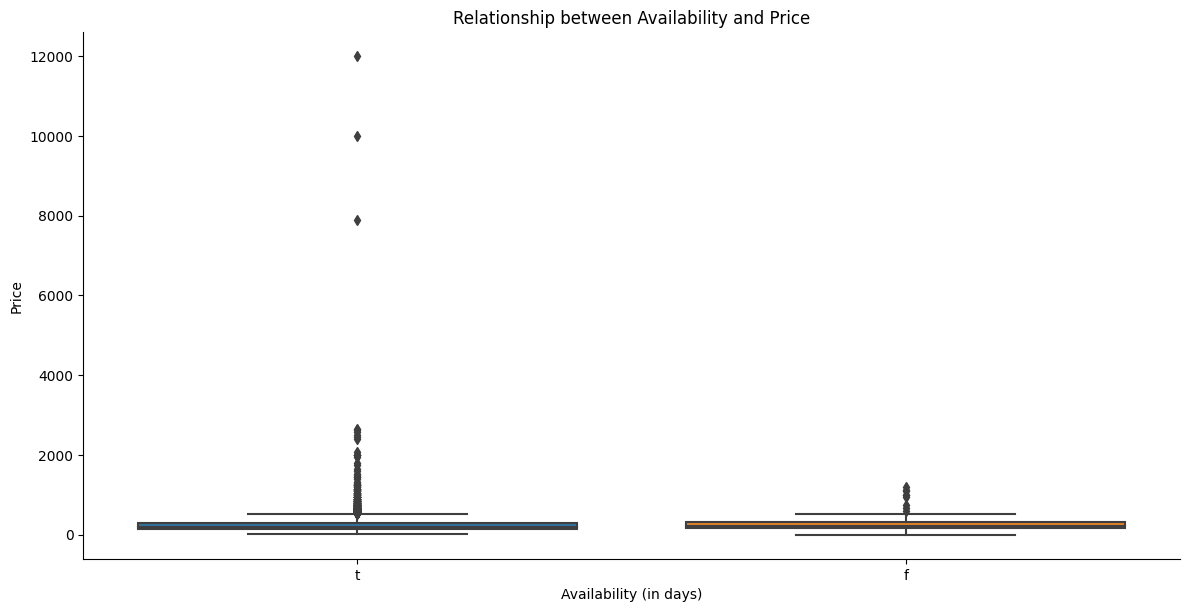

<Figure size 1200x600 with 0 Axes>

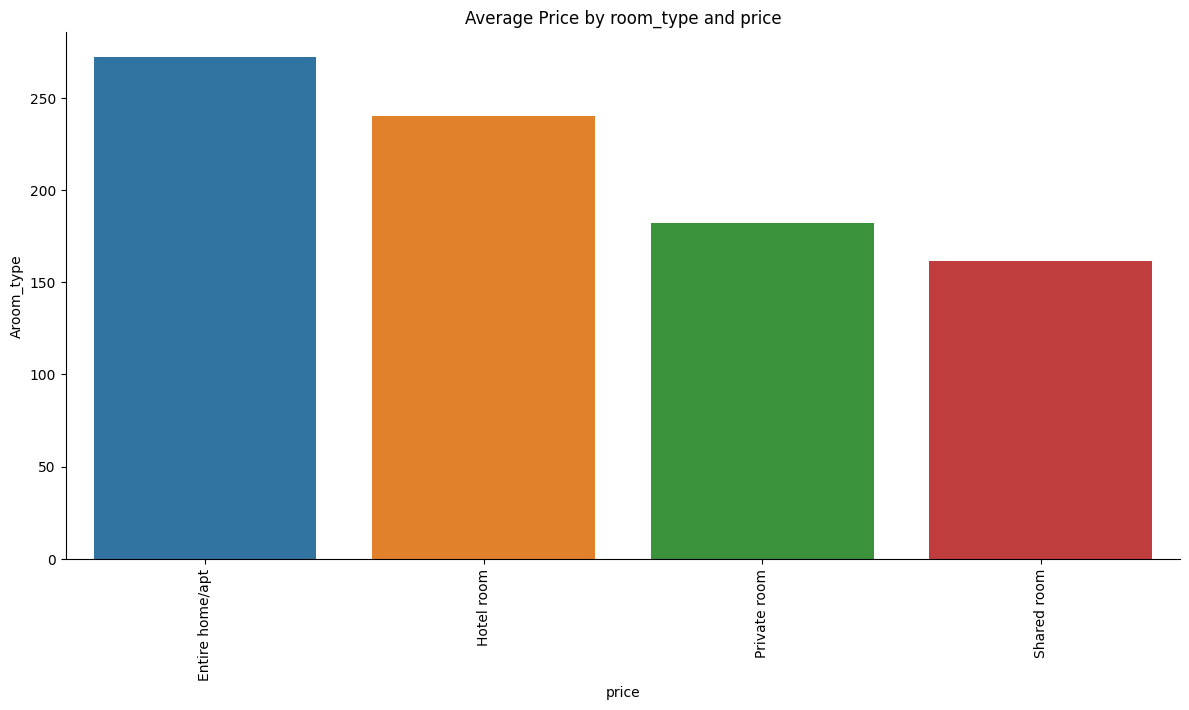

<Figure size 1200x600 with 0 Axes>

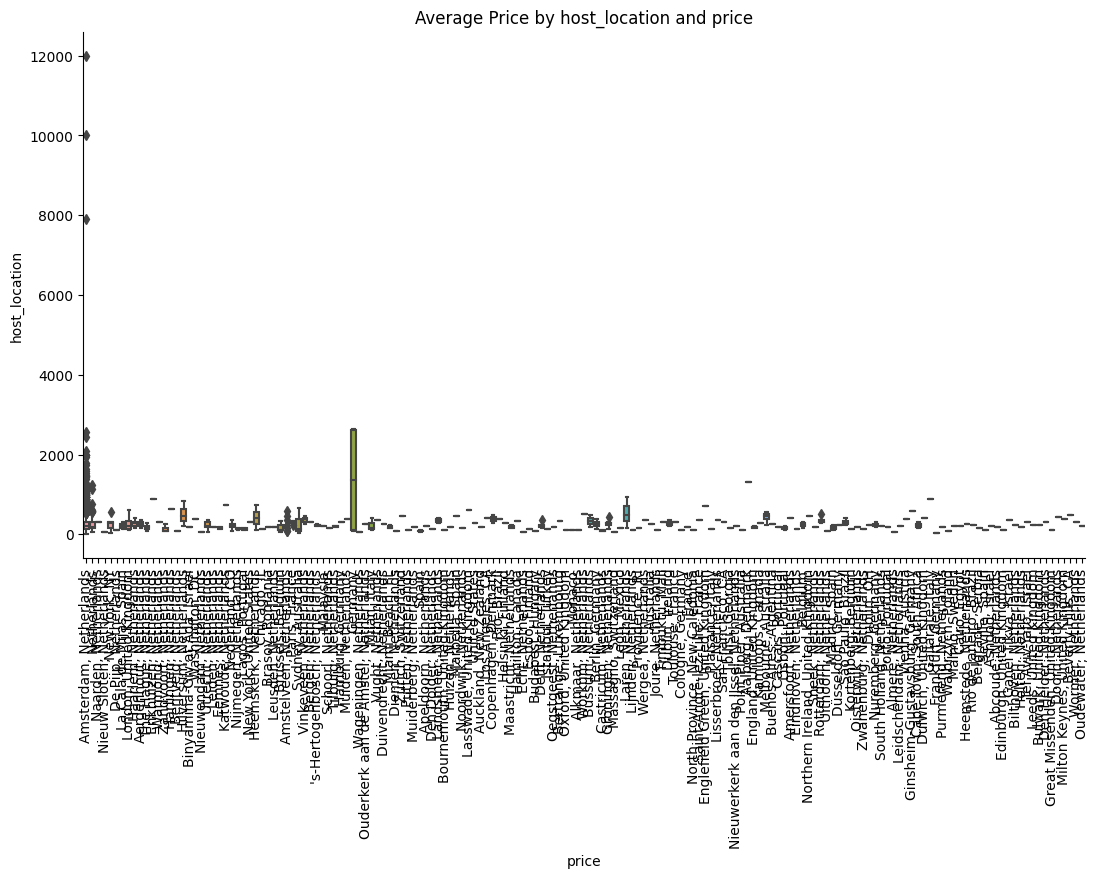

In [42]:

# Convert 'Property Type' to category type
df_cleaned['room_type'] = df_cleaned['room_type'].astype('category')
#df_cleaned['price'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Data Visualization: Box plot for property types and prices
plt.figure(figsize=(10, 6))
sns.catplot(x='room_type', y='price', data=df_cleaned, kind='box', height=4, aspect=2)
plt.title("Box Plot of Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Relationship between availability and price
plt.figure(figsize=(10, 6))
sns.catplot(x='has_availability', y='price', data=df_cleaned, kind='box', height=6, aspect=2)
plt.title('Relationship between Availability and Price')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')
plt.show()

# Relationship between location and average price
avg_price_by_location = df_cleaned.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.catplot(x='room_type', y='price', data=avg_price_by_location, kind='bar', height=6, aspect=2)
plt.title('Average Price by room_type and price')
plt.xlabel('price')
plt.ylabel('Aroom_type')
plt.xticks(rotation=90)
plt.show()

# Relationship between host_location and average price
avg_price_by_location = df_cleaned.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.catplot(x='host_location', y='price', data=df_cleaned, kind='box', height=6, aspect=2)
plt.title('Average Price by host_location and price')
plt.xlabel('price')
plt.ylabel('host_location')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

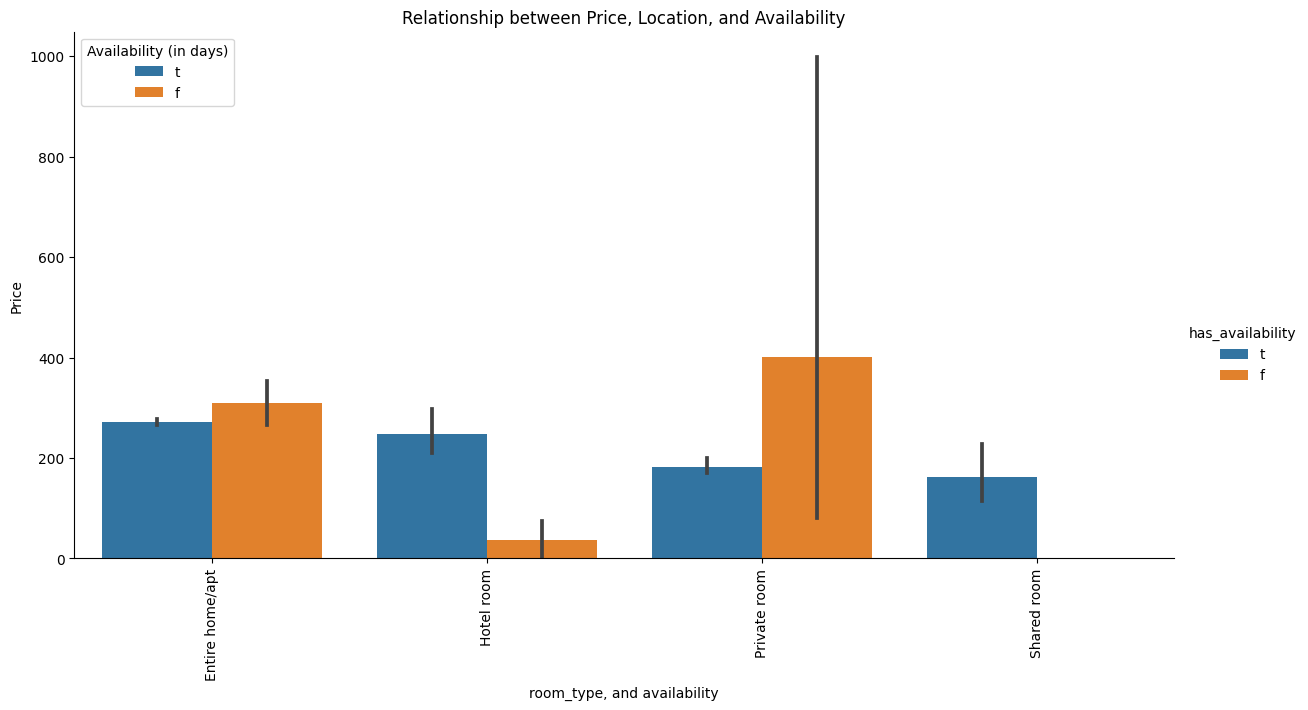

In [44]:
# Relationship between price, room_type, and availability
plt.figure(figsize=(12, 6))
sns.catplot(x='room_type', y='price', hue='has_availability', data=df_cleaned, kind='bar', height=6, aspect=2)
plt.title('Relationship between Price, Location, and Availability')
plt.xlabel('room_type, and availability')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(title='Availability (in days)')
plt.show()

In [47]:
print("Analysis Summary:")
print("1- The distribution of prices shows that  The demand for the private room is high despite its price being higher than the other rooms")



print("2- The sharing room has low demand, and its price is the cheapest.")
print("3- Half of the quantity of the entire apartment is booked.")


Analysis Summary:
1- The distribution of prices shows that  The demand for the private room is high despite its price being higher than the other rooms
2- The sharing room has low demand, and its price is the cheapest.
3- Half of the quantity of the entire apartment is booked.
